In [2]:
import numpy as np

In [3]:
# FROM OMRON documentation
# l0 = 5.1 - 2*(0.4)
y_shift = 0
x_shift = 0.4

# FROM article
l0 = 3.5                      
O_ff = 0
w = 0.1

# sides of Infrared LED
S1  = 0.35 
S2 = 0.35 

# sides of LED metal platform (approx)
dps1 = 0.1
dps2 = 0.1

# sides of phototransistor
X = 0.22
Y = 0.76

# sides of PT metal platform (approx)
dpx = 0.16
dpx = 0.29

In [26]:
BARRIER_WINDOW = np.array([0.5, 0.5, 0.5])

# Firstly, lets try to simulate how the lights achieves the barrier

In [27]:
y = 0.0
BARRIER_POS = 0.0, y, l0 / 2

LED_POS = 0.0, 0.0, 0.0

PT_POS = x_shift, y_shift, l0

In [ ]:
# def calc_angle_to_barrier()

In [28]:
led = np.array(LED_POS)
pt = np.array(PT_POS)
bar = np.array(BARRIER_POS)
main_trace = led - pt

In [29]:
n# point where barrier meets the main trace:
B = (main_trace/np.linalg.norm(main_trace)) * bar[2]/main_trace[2]
B

array([ 0.0567733 , -0.        ,  0.49676634])

In [30]:
w_b, h_b, d_b = BARRIER_WINDOW

barrier_area = w_b*h_b

# def is_in_square(point: np.ndarray, square_center: np.ndarray, w, h, d):
    
#     return 

barrier_area

0.25

In [31]:
def project_area_along_vector(vector_to_area:np.ndarray, area: float, vector_to_plane: np.ndarray) -> np.float32:
    """
    Source - source of lights, area - surface area, vector to plane - the vector along vector_to_area.
    
    vector_to_area - vector from source to specified area
    vector_to_plane - vector from source to needed point
    area - area we need to project
    """
    r_1 = np.linalg.norm(vector_to_area)
    r_2 = np.linalg.norm(vector_to_plane)

    result_area = area*(r_2/r_1)**2

    return result_area

In [43]:
barrier_vec = bar - led
pt_vec = pt - led

# r_2/r1 coefficient
k = pt_vec[2] / barrier_vec[2]

surface_vec = barrier_vec * k

res_area = project_area_along_vector(
    area=barrier_area, vector_to_area=(bar - led), vector_to_plane=(surface_vec)
)

1.0

In [44]:
from collections import namedtuple
Rectangle_tuple = namedtuple('Rectangle',  'xmin ymin xmax ymax')

pt_left_bottom = pt - np.array([X/2, Y/2, l0])
pt_right_up = pt + np.array([X/2, Y/2, l0])

rec_pt = Rectangle_tuple(*pt_left_bottom[:2], *pt_right_up[:2])

ill_spot = LED_POS + surface_vec
ill_spot_left_bottom = ill_spot + BARRIER_WINDOW * k/2
ill_spot_right_up = ill_spot - BARRIER_WINDOW * k/2
rec_ill = Rectangle_tuple(*ill_spot_left_bottom[:2], *ill_spot_right_up[:2])

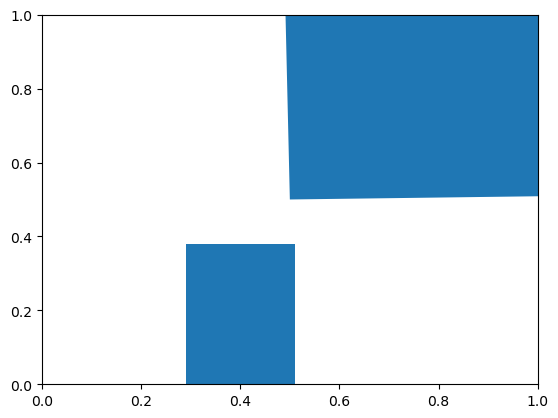

In [48]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection



# Create figure and axes
fig, ax = plt.subplots(1)

pt_box = Rectangle(pt_left_bottom, X, Y)
sur_box = Rectangle(ill_spot_left_bottom, *BARRIER_WINDOW * k)

# Create patch collection with specified colour/alpha
pc = PatchCollection([pt_box,sur_box])

# Add collection to axes
ax.add_collection(pc)
plt.show()

In [45]:
def intersection_area(rect_1: Rectangle, rect_2: Rectangle):
    dx = min(rect_1.xmax, rect_2.xmax) - max(rect_1.xmin, rect_2.xmin)
    dy = min(rect_1.ymax, rect_2.ymax) - max(rect_1.ymin, rect_2.ymin)

    return dx*dy

In [46]:
intersection_area(rec_pt, rec_ill)

1.0

In [23]:
# barrier_trace = BARRIER_POS - LED_POS

